## Importing Different Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as plt

## Uploading Data and dealing with missing values

In [2]:
train_data = pd.read_excel(r'C:\Users\Krutarth\Desktop\Projects\7. Flight Price/Data_Train.xlsx')

In [3]:
train_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [4]:
#checking how big the data is
train_data.shape

(10683, 11)

In [5]:
#checking number of NaN values in the whole data
train_data.isna().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [6]:
'''Number of NaN Value is only 2 which is negligible compare to the whole data so removing it is a better option 
instead of filling it'''

train_data.dropna(inplace=True)

In [7]:
train_data.isna().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

# Data Cleaning and Pre-Processing

In [8]:
#Analysing Data Types of every columns 
train_data.dtypes

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
dtype: object

In [9]:
#Changing datatype of Date_of_Journey, Dep_Time & Arrival_Time in DateTime Format using function

def change_into_datetime(col):
    '''This is a function to change any columns datatype to datetime datatype'''
    train_data[col] = pd.to_datetime(train_data[col])

for i in ['Date_of_Journey','Dep_Time', 'Arrival_Time']:
    change_into_datetime(i)

In [10]:
#Verifying the changes
train_data.dtypes

Airline                    object
Date_of_Journey    datetime64[ns]
Source                     object
Destination                object
Route                      object
Dep_Time           datetime64[ns]
Arrival_Time       datetime64[ns]
Duration                   object
Total_Stops                object
Additional_Info            object
Price                       int64
dtype: object

In [11]:
train_data.head(1)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2021-05-31 22:20:00,2021-03-22 01:10:00,2h 50m,non-stop,No info,3897


In [12]:
#Adding 2 new columns for specific Date and Month of Journey

train_data['journey_day'] = train_data['Date_of_Journey'].dt.day
train_data['journey_month'] = train_data['Date_of_Journey'].dt.month

In [13]:
#Verifying the changes
train_data.head(1)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,journey_day,journey_month
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2021-05-31 22:20:00,2021-03-22 01:10:00,2h 50m,non-stop,No info,3897,24,3


In [14]:
#Now no need of Date_of_Journey column so dropping it
train_data.drop('Date_of_Journey', axis=1 , inplace=True)

In [15]:
#Verifying the changes
train_data.head(1)

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,journey_day,journey_month
0,IndiGo,Banglore,New Delhi,BLR → DEL,2021-05-31 22:20:00,2021-03-22 01:10:00,2h 50m,non-stop,No info,3897,24,3


## Extracting Derived Features from Data

In [16]:
#Creating Function to extract Hour and minute from any column of the dataset

def extract_hour(df,col):
    df[col+'_hour'] = df[col].dt.hour

def extract_minute(df,col):
    df[col+'_minute'] = df[col].dt.minute
    
#Creating Function to drop any column

def drop_column(df,col):
    df.drop(col, axis=1, inplace=True)

In [17]:
# Splitting data of Dep_Time and Arrival_Time based on minute and hour using above option

extract_hour(train_data,'Dep_Time')
extract_minute(train_data,'Dep_Time')

extract_hour(train_data,'Arrival_Time')
extract_minute(train_data,'Arrival_Time')

drop_column(train_data,'Dep_Time')
drop_column(train_data,'Arrival_Time')

In [18]:
#Verifying the changes
train_data.head(1)

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,journey_day,journey_month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10


In [19]:
#Pre_Processing the Duration Column so model can understand easily

duration = list(train_data['Duration'])

for i in range(len(duration)):
    if len(duration[i].split(' ')) == 2:
        pass
    else:
        if 'h' in duration[i]:
            duration[i] = duration[i] + ' 0m'
        else:
            duration[i] = '0h ' + duration[i] 
    
train_data['Duration'] = duration

In [20]:
#Verifying the changes
train_data.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,journey_day,journey_month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,5,1,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h 0m,2 stops,No info,13882,6,9,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,5,12,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,3,1,16,50,21,35


In [21]:
#splitting Hour and Minute From Duration Column


def hour(x):
    return x.split(' ')[0][0:-1]

def min(x):
    return x.split(' ')[1][0:-1]

train_data['Duration_hours']=train_data['Duration'].apply(hour)
train_data['Duration_mins']=train_data['Duration'].apply(min)

#Dropping Duration Column
drop_column(train_data,'Duration')

In [22]:
#Verifying the changes
train_data.head(1)

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,journey_day,journey_month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_mins
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,24,3,22,20,1,10,2,50


In [23]:
train_data.dtypes

Airline                object
Source                 object
Destination            object
Route                  object
Total_Stops            object
Additional_Info        object
Price                   int64
journey_day             int64
journey_month           int64
Dep_Time_hour           int64
Dep_Time_minute         int64
Arrival_Time_hour       int64
Arrival_Time_minute     int64
Duration_hours         object
Duration_mins          object
dtype: object

In [24]:
#changing data type of Duration hours and minutes

train_data['Duration_hours']=train_data['Duration_hours'].astype(int)
train_data['Duration_mins']=train_data['Duration_mins'].astype(int)

In [25]:
train_data.dtypes

Airline                object
Source                 object
Destination            object
Route                  object
Total_Stops            object
Additional_Info        object
Price                   int64
journey_day             int64
journey_month           int64
Dep_Time_hour           int64
Dep_Time_minute         int64
Arrival_Time_hour       int64
Arrival_Time_minute     int64
Duration_hours          int32
Duration_mins           int32
dtype: object

In [26]:
# All the columns with alphabets only
cat_col =[col for col in train_data.columns if train_data[col].dtype == 'O']
cat_col


['Airline', 'Source', 'Destination', 'Route', 'Total_Stops', 'Additional_Info']

In [27]:
# All the columns with numbers only
cont_col =[col for col in train_data.columns if train_data[col].dtype != 'O']
cont_col

['Price',
 'journey_day',
 'journey_month',
 'Dep_Time_hour',
 'Dep_Time_minute',
 'Arrival_Time_hour',
 'Arrival_Time_minute',
 'Duration_hours',
 'Duration_mins']

## Handling Categorical Data

We are using 2 main Encoding Techniques to convert Categorical data into some numerical format

Nominal data --> data are not in any order --> OneHotEncoder is used in this case

Ordinal data --> data are in order -->       LabelEncoder is used in this case

In [28]:
categorical=train_data[cat_col]
categorical.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info


In [29]:
#Analyzing Number of Airlines company
categorical['Airline'].value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

## Airline vs Price Analysis

<AxesSubplot:xlabel='Airline', ylabel='Price'>

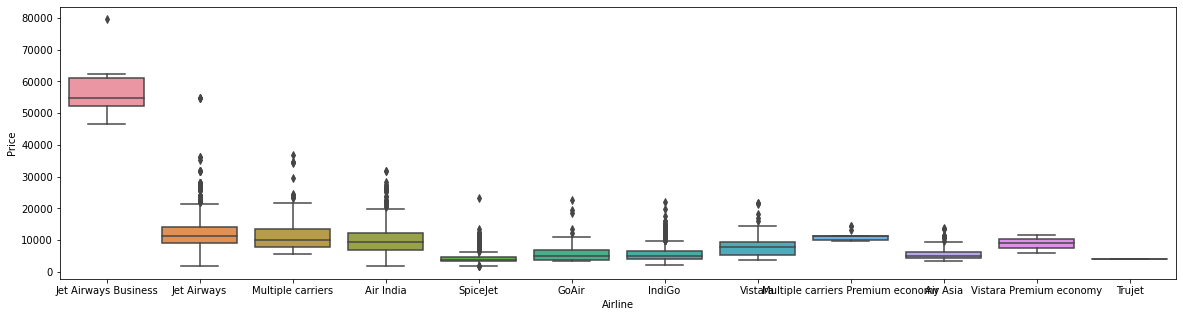

In [30]:
#Comparing Prices of Flight company wise with the help of boxplot
from matplotlib import *
import sys
from pylab import *
plt.figure(figsize=(20,5))
sns.boxplot(y='Price',x='Airline',data=train_data.sort_values('Price',ascending=False))

Conclusion--> From graph we can see that Jet Airways Business have the highest Price., Apart from the first Airline almost all are having similar median¶


Perform Total_Stops vs Price Analysis

<AxesSubplot:xlabel='Total_Stops', ylabel='Price'>

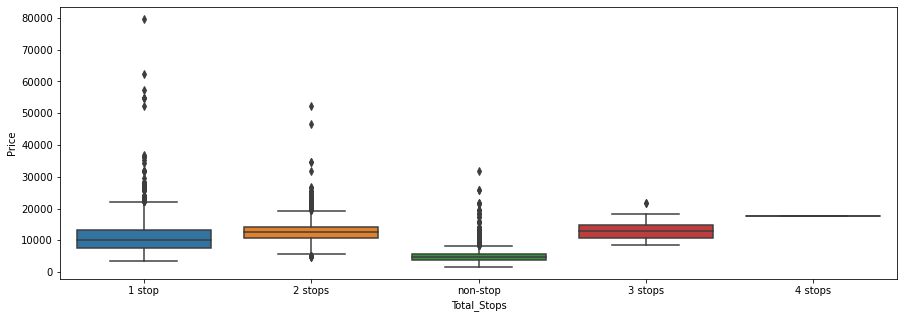

In [31]:
plt.figure(figsize=(15,5))
sns.boxplot(y='Price',x='Total_Stops',data=train_data.sort_values('Price',ascending=False))

In [32]:
#Unique number of Airlines
len(categorical['Airline'].unique())

12

In [33]:
# As Airline is Nominal Categorical data we will perform OneHotEncoding
Airline=pd.get_dummies(categorical['Airline'], drop_first=True)
Airline.head()

,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy
0,0,0,1,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0


## Source vs Price Analysis

In [34]:
categorical['Source'].value_counts()

Delhi       4536
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: Source, dtype: int64

<AxesSubplot:xlabel='Source', ylabel='Price'>

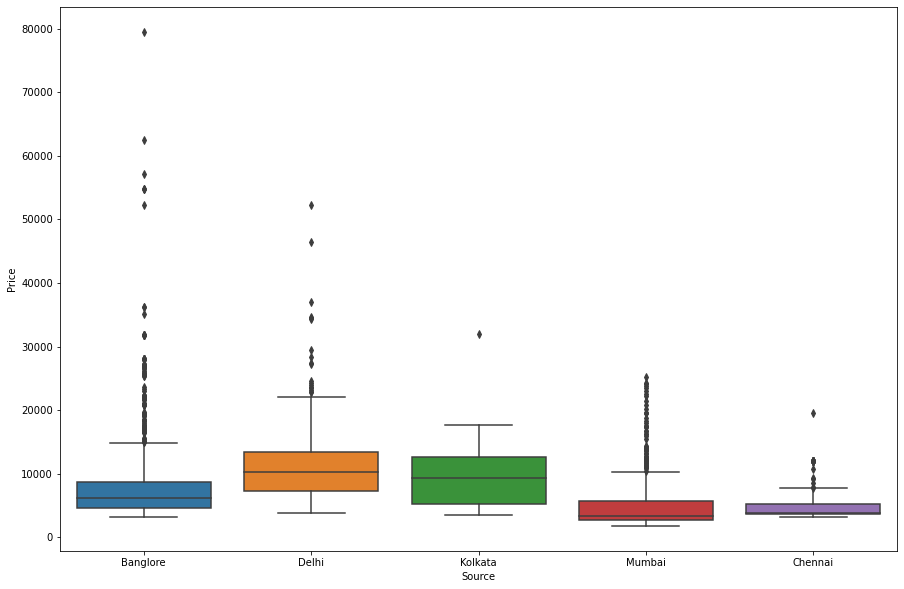

In [35]:
# Source vs Price

plt.figure(figsize=(15,10))

sns.boxplot(y='Price',x='Source',data=train_data.sort_values('Price',ascending=False))

In [36]:
# As Source is Nominal Categorical data we will perform OneHotEncoding


Source=pd.get_dummies(categorical['Source'], drop_first=True)
Source.head()

,Chennai,Delhi,Kolkata,Mumbai
0,0,0,0,0
1,0,0,1,0
2,0,1,0,0
3,0,0,1,0
4,0,0,0,0


## Destination vs Price Analysis

In [37]:
categorical['Destination'].value_counts()

Cochin       4536
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64

In [38]:
# As Source is Nominal Categorical data we will perform OneHotEncoding


Source=pd.get_dummies(categorical['Destination'], drop_first=True)
Source.head()

,Cochin,Delhi,Hyderabad,Kolkata,New Delhi
0,0,0,0,0,1
1,0,0,0,0,0
2,1,0,0,0,0
3,0,0,0,0,0
4,0,0,0,0,1


<AxesSubplot:xlabel='Destination', ylabel='Price'>

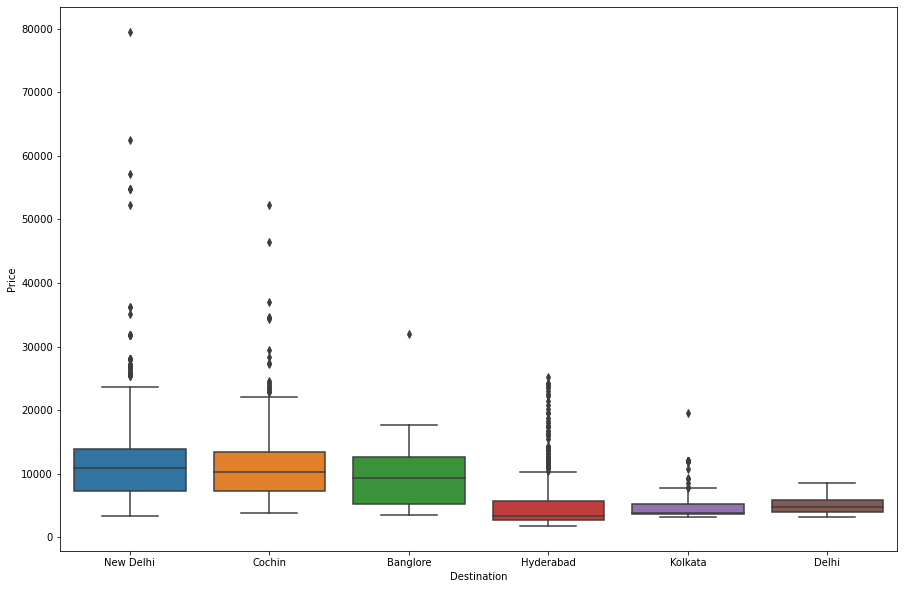

In [39]:
# Destination vs Price

plt.figure(figsize=(15,10))

sns.boxplot(y='Price',x='Destination',data=train_data.sort_values('Price',ascending=False))

In [40]:
# As Source is Nominal Categorical data we will perform OneHotEncoding


Destination=pd.get_dummies(categorical['Destination'], drop_first=True)
Destination.head()

,Cochin,Delhi,Hyderabad,Kolkata,New Delhi
0,0,0,0,0,1
1,0,0,0,0,0
2,1,0,0,0,0
3,0,0,0,0,0
4,0,0,0,0,1


## Pre Processing Route Column

In [41]:
categorical.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info


In [42]:
categorical.columns

Index(['Airline', 'Source', 'Destination', 'Route', 'Total_Stops',
       'Additional_Info'],
      dtype='object')

In [43]:
#To avoid Warnings
import warnings 
from warnings import filterwarnings
filterwarnings('ignore')


'''Splitting the Route to diferent columns like Route_1, Route_2 till Route_5 
because ML Model can't understand current route column'''

categorical['Route_1']=categorical['Route'].str.split('→').str[0]
categorical['Route_2']=categorical['Route'].str.split('→').str[1]
categorical['Route_3']=categorical['Route'].str.split('→').str[2]
categorical['Route_4']=categorical['Route'].str.split('→').str[3]
categorical['Route_5']=categorical['Route'].str.split('→').str[4]

In [44]:
drop_column(categorical,'Route')

In [45]:
categorical.head()

,Airline,Source,Destination,Total_Stops,Additional_Info,Route_1,Route_2,Route_3,Route_4,Route_5
0,IndiGo,Banglore,New Delhi,non-stop,No info,BLR,DEL,NaN,NaN,NaN
1,Air India,Kolkata,Banglore,2 stops,No info,CCU,IXR,BBI,BLR,NaN
2,Jet Airways,Delhi,Cochin,2 stops,No info,DEL,LKO,BOM,COK,NaN
3,IndiGo,Kolkata,Banglore,1 stop,No info,CCU,NAG,BLR,NaN,NaN
4,IndiGo,Banglore,New Delhi,1 stop,No info,BLR,NAG,DEL,NaN,NaN


In [46]:
categorical.isnull().sum()

Airline                0
Source                 0
Destination            0
Total_Stops            0
Additional_Info        0
Route_1                0
Route_2                0
Route_3             3491
Route_4             9116
Route_5            10636
dtype: int64

In [47]:
#Filling NaN with None str 

for i in ['Route_3','Route_4','Route_5']:
    categorical[i].fillna('None', inplace=True)

In [48]:
categorical.isnull().sum()

Airline            0
Source             0
Destination        0
Total_Stops        0
Additional_Info    0
Route_1            0
Route_2            0
Route_3            0
Route_4            0
Route_5            0
dtype: int64

In [49]:
#now extract how many categories in each cat_feature
for feature in categorical.columns:
    print('{} has total {} categories \n'.format(feature,len(categorical[feature].value_counts())))

Airline has total 12 categories 

Source has total 5 categories 

Destination has total 6 categories 

Total_Stops has total 5 categories 

Additional_Info has total 10 categories 

Route_1 has total 5 categories 

Route_2 has total 45 categories 

Route_3 has total 30 categories 

Route_4 has total 14 categories 

Route_5 has total 6 categories 



In [50]:
'''as we will see we have lots of features in Route ,
one hot encoding will not be a better option lets appply Label Encoding'''

from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()

for i in ['Route_1', 'Route_2', 'Route_3', 'Route_4','Route_5']:
    categorical[i]=encoder.fit_transform(categorical[i])

In [51]:
categorical.head(1)

,Airline,Source,Destination,Total_Stops,Additional_Info,Route_1,Route_2,Route_3,Route_4,Route_5
0,IndiGo,Banglore,New Delhi,non-stop,No info,0,13,29,13,5


In [52]:
#Additional_info column is of no use so just dropping that column
drop_column(categorical,'Additional_Info')

## Pre Processing of Total_Stops column

In [53]:
categorical['Total_Stops'].value_counts()

1 stop      5625
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: Total_Stops, dtype: int64

In [54]:
categorical['Total_Stops'].unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', '4 stops'],
      dtype=object)

In [55]:
# As this is case of Ordinal Categorical type we perform LabelEncoder
# Here Values are assigned with corresponding key

dict={'non-stop':0, '2 stops':2, '1 stop':1, '3 stops':3, '4 stops':4}

categorical['Total_Stops']=categorical['Total_Stops'].map(dict)

categorical.head()

,Airline,Source,Destination,Total_Stops,Route_1,Route_2,Route_3,Route_4,Route_5
0,IndiGo,Banglore,New Delhi,0,0,13,29,13,5
1,Air India,Kolkata,Banglore,2,2,25,1,3,5
2,Jet Airways,Delhi,Cochin,2,3,32,4,5,5
3,IndiGo,Kolkata,Banglore,1,2,34,3,13,5
4,IndiGo,Banglore,New Delhi,1,0,34,8,13,5


In [56]:
#Merging all dataframes as Preprocessing part is done

# Concatenate dataframe --> categorical + Airline + Source + Destination

data_train=pd.concat([categorical,Airline,Source,Destination,train_data[cont_col]],axis=1)
data_train.head()

,Airline,Source,Destination,Total_Stops,Route_1,Route_2,Route_3,Route_4,Route_5,Air India,...,New Delhi,Price,journey_day,journey_month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_mins
0,IndiGo,Banglore,New Delhi,0,0,13,29,13,5,0,...,1,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,2,2,25,1,3,5,1,...,0,7662,5,1,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,2,3,32,4,5,5,0,...,0,13882,6,9,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,1,2,34,3,13,5,0,...,0,6218,5,12,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,1,0,34,8,13,5,0,...,1,13302,3,1,16,50,21,35,4,45


In [57]:
#Dropping Airline, Source and Destination as they are already there as a column headers
drop_column(data_train,'Airline')
drop_column(data_train,'Source')
drop_column(data_train,'Destination')

data_train.head()

,Total_Stops,Route_1,Route_2,Route_3,Route_4,Route_5,Air India,GoAir,IndiGo,Jet Airways,...,New Delhi,Price,journey_day,journey_month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_mins
0,0,0,13,29,13,5,0,0,1,0,...,1,3897,24,3,22,20,1,10,2,50
1,2,2,25,1,3,5,1,0,0,0,...,0,7662,5,1,5,50,13,15,7,25
2,2,3,32,4,5,5,0,0,0,1,...,0,13882,6,9,9,25,4,25,19,0
3,1,2,34,3,13,5,0,0,1,0,...,0,6218,5,12,18,5,23,30,5,25
4,1,0,34,8,13,5,0,0,1,0,...,1,13302,3,1,16,50,21,35,4,45


In [58]:
#Expanding view so that we can see all columns

pd.set_option('display.max_columns',35)
data_train.head()

,Total_Stops,Route_1,Route_2,Route_3,Route_4,Route_5,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy,...,Hyderabad,Kolkata,New Delhi,Cochin,Delhi,Hyderabad,Kolkata,New Delhi,Price,journey_day,journey_month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_mins
0,0,0,13,29,13,5,0,0,1,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,1,3897,24,3,22,20,1,10,2,50
1,2,2,25,1,3,5,1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,7662,5,1,5,50,13,15,7,25
2,2,3,32,4,5,5,0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,13882,6,9,9,25,4,25,19,0
3,1,2,34,3,13,5,0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,6218,5,12,18,5,23,30,5,25
4,1,0,34,8,13,5,0,0,1,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,1,13302,3,1,16,50,21,35,4,45


## Outlier Detection and its Imputation

In [59]:
def plot(df,col):
    fig,(ax1,ax2)=plt.subplots(2,1)
    sns.distplot(df[col],ax=ax1)
    sns.boxplot(df[col],ax=ax2)
    

<Figure size 2160x1440 with 0 Axes>

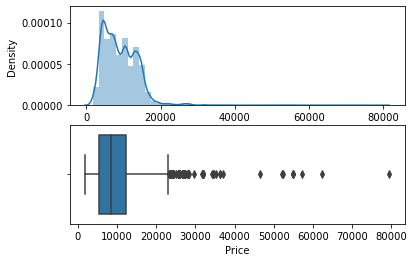

In [60]:
plt.figure(figsize=(30,20))
plot(data_train,'Price')

<Figure size 2160x1440 with 0 Axes>

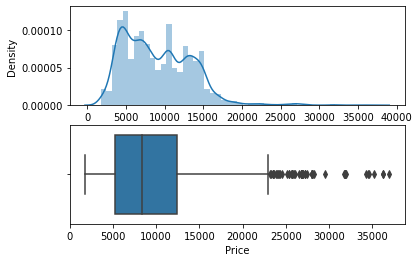

In [61]:
#if Price is greater than 40,000 than it will replace it with median otherwise no change
data_train['Price']=np.where(data_train['Price']>=40000,data_train['Price'].median(),data_train['Price'])

plt.figure(figsize=(30,20))
plot(data_train,'Price')

### separate your independent & dependent data

In [62]:
X=data_train.drop('Price',axis=1)
X.head()

,Total_Stops,Route_1,Route_2,Route_3,Route_4,Route_5,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy,Cochin,Delhi,Hyderabad,Kolkata,New Delhi,Cochin,Delhi,Hyderabad,Kolkata,New Delhi,journey_day,journey_month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_mins
0,0,0,13,29,13,5,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,24,3,22,20,1,10,2,50
1,2,2,25,1,3,5,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5,1,5,50,13,15,7,25
2,2,3,32,4,5,5,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,6,9,9,25,4,25,19,0
3,1,2,34,3,13,5,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5,12,18,5,23,30,5,25
4,1,0,34,8,13,5,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,3,1,16,50,21,35,4,45


In [63]:
y=data_train['Price']
y

0         3897.0
1         7662.0
2        13882.0
3         6218.0
4        13302.0
          ...   
10678     4107.0
10679     4145.0
10680     7229.0
10681    12648.0
10682    11753.0
Name: Price, Length: 10682, dtype: float64

In [64]:
type(X)

pandas.core.frame.DataFrame

In [65]:
type(y)

pandas.core.series.Series

In [66]:
X.isnull().sum()

Total_Stops                          0
Route_1                              0
Route_2                              0
Route_3                              0
Route_4                              0
Route_5                              0
Air India                            0
GoAir                                0
IndiGo                               0
Jet Airways                          0
Jet Airways Business                 0
Multiple carriers                    0
Multiple carriers Premium economy    0
SpiceJet                             0
Trujet                               0
Vistara                              0
Vistara Premium economy              0
Cochin                               0
Delhi                                0
Hyderabad                            0
Kolkata                              0
New Delhi                            0
Cochin                               0
Delhi                                0
Hyderabad                            0
Kolkata                  

In [67]:
y.isnull().sum()

0

In [68]:
#### as now we dont have any missing value in data, we can definitely go ahead with Feature Selection

## Feature Selection

Finding out the best feature which will contribute and have good relation with target variable.

## Why to apply Feature Selection?

To select important features to get rid of curse of dimensionality ie..to get rid of duplicate features

In [69]:
np.array(X)

array([[ 0,  0, 13, ..., 10,  2, 50],
       [ 2,  2, 25, ..., 15,  7, 25],
       [ 2,  3, 32, ..., 25, 19,  0],
       ...,
       [ 0,  0, 13, ..., 20,  3,  0],
       [ 0,  0, 13, ..., 10,  2, 40],
       [ 2,  3, 16, ..., 15,  8, 20]], dtype=int64)

In [70]:
np.array(y)

array([ 3897.,  7662., 13882., ...,  7229., 12648., 11753.])

In [71]:
from sklearn.feature_selection import mutual_info_classif

In [72]:
mutual_info_classif(np.array(X),np.array(y))

array([2.10886620e+00, 2.01323230e+00, 2.83824225e+00, 2.32302846e+00,
       1.47505438e+00, 6.59667538e-01, 7.42210040e-01, 1.01604827e-01,
       6.78999249e-01, 9.24603841e-01, 0.00000000e+00, 5.76678246e-01,
       1.59155056e-02, 3.30735010e-01, 1.06782661e-02, 2.20740829e-01,
       2.51269782e-03, 1.54341929e+00, 3.94518048e-01, 2.94687857e-01,
       1.61613179e-01, 3.57325065e-01, 1.54679282e+00, 4.07303510e-01,
       2.94134417e-01, 1.82404270e-01, 3.81648143e-01, 1.10697525e+00,
       8.66437619e-01, 1.43329134e+00, 1.21498348e+00, 1.86116959e+00,
       1.54756306e+00, 1.79587147e+00, 1.05623696e+00])

In [73]:
imp=pd.DataFrame(mutual_info_classif(X,y),index=X.columns)
imp

,0
Total_Stops,2.170671
Route_1,2.059874
Route_2,2.802587
Route_3,2.239945
Route_4,1.474428
Route_5,0.760246
Air India,0.751328
GoAir,0.102033
IndiGo,0.675661
Jet Airways,0.907108


In [74]:
imp.columns=['importance']
imp.sort_values(by='importance',ascending=False)

,importance
Route_2,2.802587
Route_3,2.239945
Total_Stops,2.170671
Route_1,2.059874
Arrival_Time_hour,1.857135
Duration_hours,1.778570
Cochin,1.560694
Cochin,1.550033
Arrival_Time_minute,1.543673
Route_4,1.474428


## split dataset into train & test

In [75]:
from sklearn.model_selection import train_test_split

In [76]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [77]:
from sklearn import metrics
import pickle
def predict(ml_model,dump):
    model=ml_model.fit(X_train,y_train)
    print('Training score : {}'.format(model.score(X_train,y_train)))
    y_prediction=model.predict(X_test)
    print('predictions are: \n {}'.format(y_prediction))
    print('\n')
    r2_score=metrics.r2_score(y_test,y_prediction)
    print('r2 score: {}'.format(r2_score))
    print('MAE:',metrics.mean_absolute_error(y_test,y_prediction))
    print('MSE:',metrics.mean_squared_error(y_test,y_prediction))
    print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test,y_prediction)))
    sns.distplot(y_test-y_prediction)
    
    if dump==1:
        ##dumping my model using pickle so that I can re-use
        file=open(r'C:\Users\Krutarth\Desktop\Projects\7. Flight Price/model.pkl','wb')
        pickle.dump(model,file)

## Prediction by Different Algorithms

In [78]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LogisticRegression

Training score : 0.6182205596366628
predictions are: 
 [ 4367.44604814 10913.49482066 12107.3863257  ... 11673.05759183
  5912.39219415 13889.08807672]


r2 score: 0.6057320359187335
MAE: 1954.287938099213
MSE: 7828910.1740034055
RMSE: 2798.01897313142


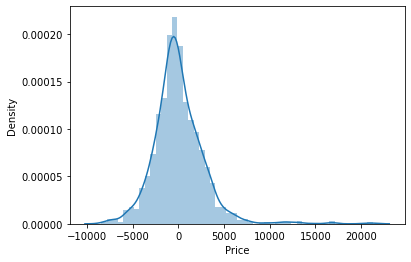

In [79]:
predict(LinearRegression(),0)

In [80]:
#62% Training Score Accuracy from Linear Regression

Training score : 0.7767639707141398
predictions are: 
 [ 4152.4 12012.4 12051.4 ... 13598.2 11636.   9457.2]


r2 score: 0.6601043718888322
MAE: 1737.1452503509593
MSE: 6749248.1851006085
RMSE: 2597.931520479439


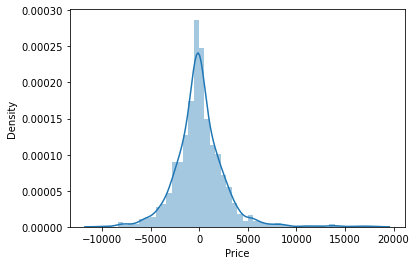

In [81]:
predict(KNeighborsRegressor(),0)

In [82]:
#78% Training Score Accuracy from KNeighnours Regression

Training score : 0.9538134831683593
predictions are: 
 [ 4171.52       11449.97583333 12831.82333333 ... 14062.70083333
  8151.69       12573.36      ]


r2 score: 0.8346369333092885
MAE: 1148.6152277874337
MSE: 3283585.564036517
RMSE: 1812.0666555169864


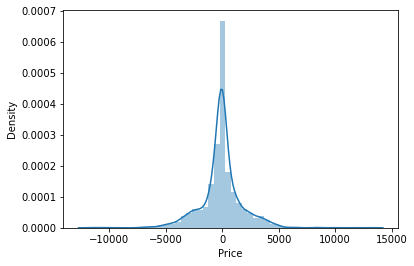

In [83]:
predict(RandomForestRegressor(),1)

In [84]:
#95.5% Training Score Accuracy from Random Forest Regressor

Training score : 0.9674507729753864
predictions are: 
 [ 3943.  10703.  12707.5 ... 14714.   9923.  11087. ]


r2 score: 0.699211642813321
MAE: 1360.1164560910934
MSE: 5972701.92948058
RMSE: 2443.9111950888437


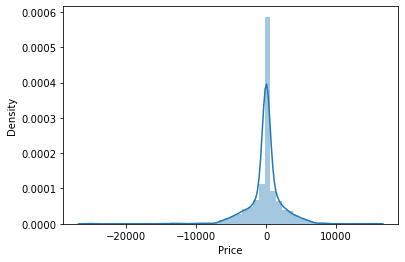

In [85]:
predict(DecisionTreeRegressor(),0)

In [86]:
#96.7% Training Score Accuracy from Decission Tree Regressor

Training score : 0.3433586892919836
predictions are: 
 [ 3943. 14151.  9663. ...  7408.  4226. 13817.]


r2 score: 0.5278290572054791
MAE: 1941.918109499298
MSE: 9375816.030416472
RMSE: 3061.99543278831


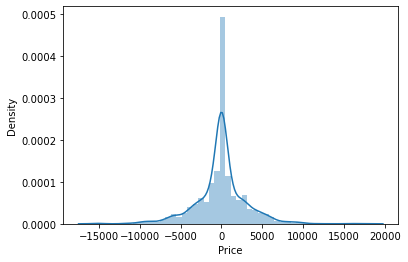

In [87]:
predict(LogisticRegression(),0)

# Hypertuning Model

1.Choose following method for hyperparameter tuning
    
    
    a.RandomizedSearchCV --> Fast way to Hypertune model
    b.GridSearchCV--> Slow way to hypertune my model


2.Assign hyperparameters in form of dictionary


3.Fit the model


4.Check best paramters and best score

In [89]:
from sklearn.model_selection import RandomizedSearchCV

In [90]:
# Number of trees in random forest
n_estimators=[int(x) for x in np.linspace(start=100,stop=1200,num=6)]

# Number of features to consider at every split
max_features=['auto','sqrt']

# Maximum number of levels in tree
max_depth=[int(x) for x in np.linspace(5,30,num=4)]

# Minimum number of samples required to split a node
min_samples_split=[5,10,15,100]

In [92]:
# Create the random grid

random_grid={
    'n_estimators':n_estimators,
    'max_features':max_features,
    'max_depth':max_depth,
    'min_samples_split':min_samples_split
}

random_grid

{'n_estimators': [100, 320, 540, 760, 980, 1200],
 'max_features': ['auto', 'sqrt'],
 'max_depth': [5, 13, 21, 30],
 'min_samples_split': [5, 10, 15, 100]}

In [93]:
### initialise your estimator
reg_rf=RandomForestRegressor()

In [94]:
# Random search of parameters, using 5 fold cross validation

rf_random=RandomizedSearchCV(estimator=reg_rf,param_distributions=random_grid,cv=5,verbose=2,n_jobs=-1)

In [95]:
rf_random.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   52.9s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:  1.5min finished


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
                   param_distributions={'max_depth': [5, 13, 21, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_split': [5, 10, 15, 100],
                                        'n_estimators': [100, 320, 540, 760,
                                                         980, 1200]},
                   verbose=2)

In [96]:
rf_random.best_params_

{'n_estimators': 1200,
 'min_samples_split': 10,
 'max_features': 'auto',
 'max_depth': 13}

In [97]:
prediction=rf_random.predict(X_test)

<AxesSubplot:xlabel='Price', ylabel='Density'>

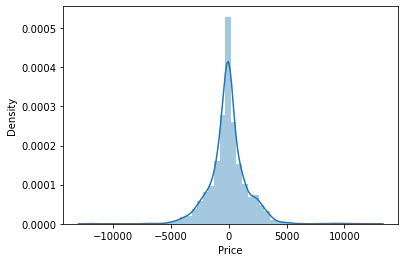

In [98]:
sns.distplot(y_test-prediction)

In [99]:
metrics.r2_score(y_test,prediction)

0.866467536836288

In [100]:
# Before Model Tuning accuracy was 83.4% and now it's 86.6% so Model Tuning always works well to improve accuracy

In [101]:
print('MAE',metrics.mean_absolute_error(y_test,prediction))
print('MSE',metrics.mean_squared_error(y_test,prediction))
print('RMSE',np.sqrt(metrics.mean_squared_error(y_test,prediction)))

MAE 1093.8618197120716
MSE 2651530.8233530214
RMSE 1628.3521803814497


# Saving the model to reuse it again

In [102]:
# open a file, where you want to store the data
file=open('rf_random.pkl','wb')

In [103]:
# dump information to that file
pickle.dump(rf_random,file)

In [104]:
model=open('rf_random.pkl','rb')
forest=pickle.load(model)

In [105]:
y_prediction=forest.predict(X_test)

In [106]:
y_prediction

array([ 4253.13297708, 12622.94805231, 11879.42636809, ...,
       12926.69251165,  8041.65605938, 13436.11921603])

In [107]:
metrics.r2_score(y_test,y_prediction)

0.866467536836288